In [111]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/chunk23_test1/coadd/129/1291p257/rs4/'
fn = topdir+'legacysurvey-1291p257-image-g.fits.fz'

fn_origin = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/coadd/129/1291p257/'+\
'legacysurvey-1291p257-image-g.fits'


In [61]:
%pylab inline
import astropy.io.fits as fits
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import detect_threshold
import astropy.io.fits as fits

from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources

Populating the interactive namespace from numpy and matplotlib


In [112]:
dat = fits.getdata(fn)
dat_origin = fits.getdata(fn_origin)
dat_origin_copy = dat_origin

In [123]:
threshold = detect_threshold(dat_origin, snr=4.)[0][0]
mean = dat[(dat<threshold)].mean()
std = dat[(dat<threshold)].std()
print(dat[(dat>mean-std)&(dat<mean+std)].sum())

-427.962


In [175]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(dat, sigma=2.5)


In [194]:
mean, median, std 

(-0.00015058391609634308, -0.00011478036, 0.0035856492479074548)

In [187]:
from photutils import make_source_mask
mask = make_source_mask(dat, snr=3, npixels=5, dilate_size=11)
mean, median, std = sigma_clipped_stats(dat, sigma=2.0, mask=mask)
print((mean, median, std))  

(-0.00015058391609634308, -0.00011478036, 0.0035856492479074548)


In [161]:
l1=dat[(dat>median-std)&(dat<median+std)].sum()
l2=((dat>median-std)&(dat<median+std)).sum()

s1=dat[(dat>median-std*6)&(dat<median+std*6)].sum()
s2=((dat>median-std*6)&(dat<median+std*6)).sum()

In [184]:
mask.sum()

1046493

In [188]:
mean*400

-0.06023356643853723

In [189]:
median*400

-0.045912142377346754

In [159]:
s1/s2*400

0.028570801937999941

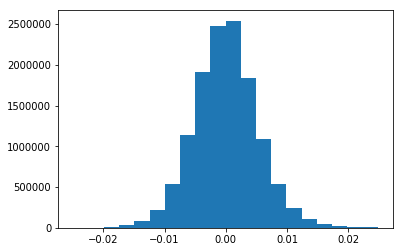

In [153]:
p=plt.hist(dat[(dat>median-std*5)&(dat<median+std*5)].ravel(),bins=20)

In [119]:
mean,std

(-0.00042188281, 0.0047203638)

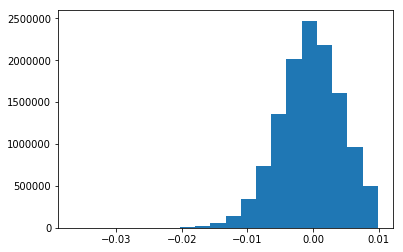

In [122]:
p=plt.hist(dat[(dat<threshold)].ravel(),bins=20)

In [67]:
import statistics
statistics.median(dat.ravel())

0.0

In [69]:
dat_origin.mean()

0.0032671127

In [44]:
threshold = detect_threshold(dat_origin, snr=2.)

In [11]:
threshold[0][0]

0.011099313

In [104]:
fn = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/129/'+'tractor-1291p257.fits'
sorces = fits.getdata(fn)

In [105]:
for i in range(len(sorces)):
    bx = int(sorces['bx'][i])
    by = int(sorces['by'][i])
    dat[by-12:by+12,bx-12:bx+12]=0

In [106]:
dat.sum()

1618.1483

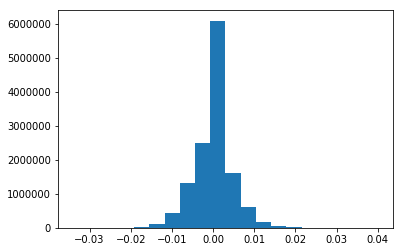

In [107]:
p=plt.hist(dat.ravel()[dat.ravel()<0.04],bins=20)

In [108]:
dat.ravel()[dat.ravel()<0.03].sum()

-877.37628

In [ ]:
dat.ravel().mean()

In [74]:
dat_origin[(dat_origin>0.011099313)]=0

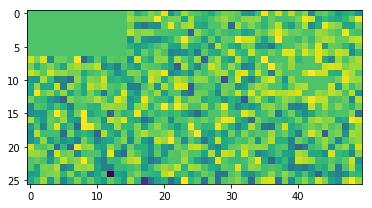

In [75]:
bx=3397
by=3599
plt.imshow(dat_origin_copy[by-25:by+25,bx-25:bx+25])

In [35]:
dat_origin.max()

0.011099284

In [36]:
np.where(dat_origin>0.01)

(array([   0,    0,    0, ..., 3599, 3599, 3599]),
 array([  23,  450,  570, ..., 3397, 3412, 3420]))

In [41]:
dat_origin.mean()

-0.00040493623